## 5.4 분산 분석과 모형 성능

### 분산 분석

선형회귀분석의 결과가 얼마나 좋은지는 단순히 잔차제곱합(RSS: Residula Sum of Square)으로 평가할 수 없다. 변수의 단위 즉, 스케일이 달라지면 회귀분석과 상관없이 잔차제곱합도 달라지기 때문이다.

분산 분석(ANOVA: Analysis of Variance)은 종속변수의 분산과 독립변수의 분산간의 관계를 사용하여 선형회귀분석의 성능을 평가하고자 하는 방법이다. 분산 분석은 서로 다른 두 개의 선형회귀분석의 성능 비교에 응용할 수 있으며 독립변수가 카테고리 변수인 경우 각 카테고리 값에 따른 영향을 정량적으로 분석하는데도 사용된다.

$\bar{y}$를 종속 변수 $y$의 샘플 평균이라고 하자.

$$\bar{y}=\frac{1}{N}\sum_{i=1}^N y_i $$

종속 변수 $y$의 분산(샘플의 갯수로 나누지 않았으므로 정확하게는 분산이 아니지만 여기에서는 분산이라는 용어를 사용하자)을 나타내는 **TSS(total sum of square)**라는 값을 정의한다. **TSS는 종속변수값의 움직임의 범위**를 나타낸다.

$$\text{TSS} = \sum_{i=1}^N (y_i-\bar{y})^2 = (y - \bar{y}1_N)^T(y - \bar{y}1_N)$$

위 식에서 $\bar{y}1_N$는 $\bar{y}$이라는 스칼라가 $N$번 반복된 브로드캐스팅 벡터다.


마찬가지로 회귀 분석에 의해 예측한 값 $\hat{y}$의 분산을 나타내는 **ESS(explained sum of squares)**,

$$\text{ESS}=\sum_{i=1}^N (\hat{y}_i -\bar{\hat{y}})^2 = (\hat{y} - \bar{\hat{y}}1_N)^T(\hat{y} - \bar{\hat{y}}1_N)$$

잔차 $e$의 분산을 나타내는 **RSS(residual sum of squares)**도 정의할 수 있다.

$$\text{RSS}=\sum_{i=1}^N (y_i - \hat{y}_i)^2\ = e^Te$$

위 식에서 $\bar{\hat{y}}$는 모형 예측값 $\hat{y}$의 평균이다.

또한 **ESS는 모형에서 나온 예측값의 움직임의 범위**, **RSS는 잔차의 움직임의 범위, 즉 오차의 크기**를 뜻한다고 볼 수 있다.

만약 회귀모형이 상수항을 포함하여 올바르게 정의되었다면 잔차의 평균이 0이 된다. 즉, 종속변수의 평균과 모형 예측값의 평균이 같다.

$$ \bar{e} = \bar{y} - \bar{\hat{y}} = 0$$

$$ \bar{y} = \bar{\hat{y}} $$

그리고 이 분산값들 간에는 다음과 같은 관계가 성립한다. 

$$\text{TSS} = \text{ESS} + \text{RSS}$$

이는 다음과 같이 증명할 수 있다.

우선 회귀 분석으로 구한 가중치 벡터를 $\hat{w}$, 독립 변수(설명 변수) $x$에 의한 종속 변수의 추정값을 $\hat{y}$, 잔차를 $e$ 라고 하면 다음 식이 성립한다.

$$ y = X\hat{w} + e = \hat{y} + e $$

그리고 $X$의 평균 데이터 $\bar{x}$

$$ 
\bar{x} = \frac{1}{N}X^T1_N
$$

에 대한 예측값은 $y$의 평균데이터 $\bar{y}$가 되므로 

$$
\bar{x}^T\hat{w} = \bar{y}
$$


각 행의 값이 평균 데이터 $\bar{x}$로 반복되는 행렬 $\bar{X}$

$$
\bar{X} = \frac{1}{N}X^T1_N 1_N^T
$$

에 대한 예측값 벡터는 $\bar{y}$값이 반복되는 벡터가 된다.

$$
\bar{X}\hat{w} = \bar{y}1_N
$$

이를 위 식에 대입하면 

$$
\hat{y} - \bar{y}1_N  = (X- \bar{X})\hat{w} 
$$

가 된다.

그런데 $\bar{X}$와 잔차 $e$는 다음과 같은 직교 관계가 성립한다. 

$$ \bar{X}^Te = \frac{1}{N}X^T1_N 1_N^Te = \frac{1}{N}X^T1_N 0 = 0 $$

직교방정식

$$
X^Te = 0
$$

과 합치면 다음 식이 성립한다.

$$ \bar{X}^Te - X^Te = (\bar{X} - X)^Te $$

따라서

$$
\begin{eqnarray}
\text{TSS} 
&=& (y - \bar{y}1_N)^T(y - \bar{y}1_N) \\
&=& (\hat{y} - \bar{y}1_N + e)^T(\hat{y} - \bar{y}1_N + e) \\
&=& (\hat{y} - \bar{y}1_N)^T(\hat{y} - \bar{y}1_N) + e^Te + 2(\hat{y} - \bar{y}1_N)^Te \\
&=& (\hat{y} - \bar{y}1_N)^T(\hat{y} - \bar{y}1_N) + e^Te + 2\hat{w}^T(X - \bar{X})^Te \\
&=& (\hat{y} - \bar{y}1_N)^T(\hat{y} - \bar{y}1_N) + e^Te \\
&=& \text{ESS} + \text{RSS}
\end{eqnarray}
$$


위 식이 말하는 바는 다음과 같다.

> 모형 예측치의 움직임의 크기(분산)은 종속변수의 움직임의 크기(분산)보다 클 수 없다.

> 모형의 성능이 좋을수록 모형 예측치의 움직임의 크기는 종속변수의 움직임의 크기와 비슷해진다.

간단한 1차원 데이터와 모형을 사용하여 이 식이 성립하는지 살펴보자.

In [1]:
from sklearn.datasets import make_regression

X0, y, coef = make_regression(
    n_samples=100, n_features=1, noise=30, coef=True, random_state=0)
dfX0 = pd.DataFrame(X0, columns=["X"])
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(y, columns=["Y"])
df = pd.concat([dfX, dfy], axis=1)

model = sm.OLS.from_formula("Y ~ X", data=df)
result = model.fit()

`RegressionResult` 타입 객체는 다음과 같이 분산분석과 관련된 속성값을 가진다.

In [2]:
print("TSS = ", result.uncentered_tss)
print("ESS = ", result.mse_model)
print("RSS = ", result.ssr)
print("ESS + RSS = ", result.mse_model + result.ssr)
print("R squared = ", result.rsquared)

TSS =  291345.7578983061
ESS =  188589.61349210917
RSS =  102754.33755137533
ESS + RSS =  291343.9510434845
R squared =  0.6473091780922586


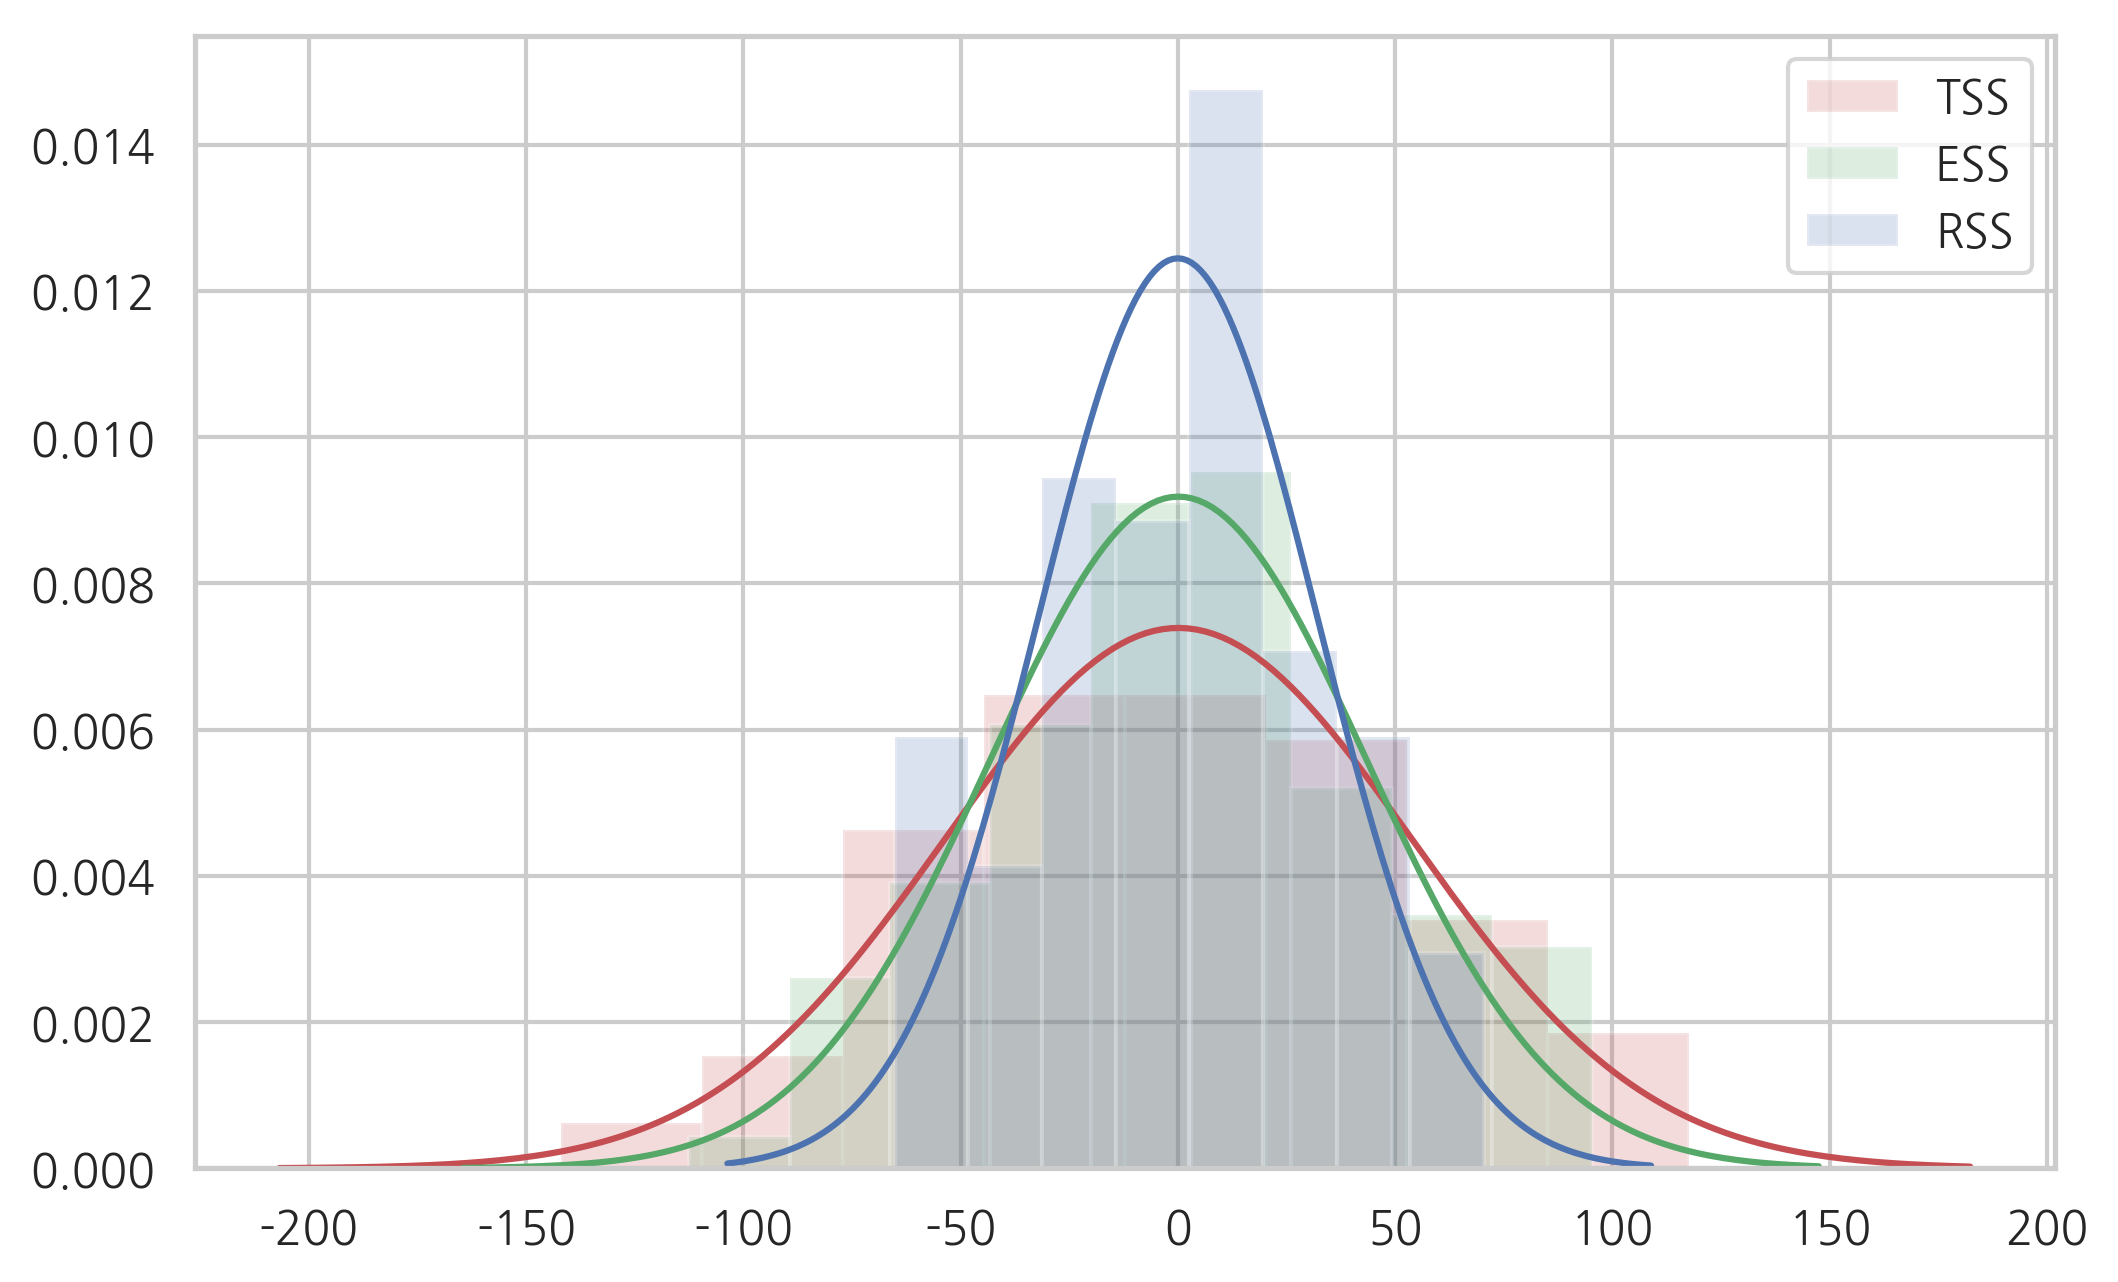

In [3]:
sns.distplot(y,
             kde=False, fit=sp.stats.norm, hist_kws={"color": "r", "alpha": 0.2}, fit_kws={"color": "r"},
             label="TSS")
sns.distplot(result.fittedvalues,
             kde=False, hist_kws={"color": "g", "alpha": 0.2}, fit=sp.stats.norm, fit_kws={"color": "g"},
             label="ESS")
sns.distplot(result.resid,
             kde=False, hist_kws={"color": "b", "alpha": 0.2}, fit=sp.stats.norm, fit_kws={"color": "b"},
             label="RSS")
plt.legend()
plt.show()

### 결정계수(Coefficient of Determination)

위의 분산 관계식에서 모형의 성능을 나타내는 결정계수(Coefficient of Determination) $R^2$를 정의할 수 있다.

$$R^2 \equiv 1 - \dfrac{\text{RSS}}{\text{TSS}}\ = \dfrac{\text{ESS}}{\text{TSS}}\ $$

분산 관계식과 모든 분산값이 0보다 크다는 점을 이용하면 $R^2$의 값은 다음과 같은 조건을 만족함을 알 수 있다.

$$0 \leq R^2  \leq 1$$

여기에서 $R^2$가 0이라는 것은 오차의 분산 RSS가 최대이고 회귀분석 예측값의 분산 ESS가 0인 경우이므로 회귀분석 결과가 아무런 의미가 없다는 뜻이다.
반대로 $R^2$가 1이라는 것은 오차의 분산 RSS가 0이고 회귀분석 예측의 분산 ESS가 TSS와 같은 경우이므로 회귀분석 결과가 완벽하다는 뜻이다.
따라서 결정계수값은 회귀분석의 성능을 나타내는 수치라고 할 수 있다.

### 분산 분석표

분산 분석의 결과는 보통 다음과 같은 분산 분석표를 사용하여 표시한다. 아래의 표에서 $N$은 데이터의 갯수, $K$는 모수의 갯수를 뜻한다.


| source | degree of freedom | sum of square | mean square  | F test-statstics | p-value |
|-|-|-|-|-|-|
| Regression| $$K-1$$ | $$\text{ESS}$$ | $$s_{\hat{y}}^2 = \dfrac{\text{ESS}}{K-1}$$   | $$F=\dfrac{s_{\hat{y}}^2}{s_e^2} $$ | p-value |
| Residual | $$N-K$$  | $$\text{RSS}$$  | $$s_e^2= \dfrac{\text{RSS}}{N-K}$$ | |
| Total     | $$N-1$$  | $$\text{TSS}$$ | $$s_y^2= \dfrac{\text{TSS}}{N-1}$$ | |
| $R^2$   |    |  $$\text{ESS} / \text{TSS}$$ |  | |


표 29.1 : 분산 분석표

### 회귀 분석 F-검정과 분산 분석의 관계

이러한 모양의 표를 사용하는 이유는 분산 분석의 결과를 이용하여 회귀 분석 F-검정에 필요한 검정통계량을 구할 수 있기 때문이다. 

회귀 분석 F-검정의 원래 귀무 가설은 모든 계수 $w_i$가 $0$ 이라는 것이지만 이 때는 모형이 아무런 의미가 없으므로 결정계수 값도 0이 된다 

$$ H_0: R^2 = 0 $$

이 때 $\hat{w}$값은 기대값이 0인 정규 분포에서 나온 표본이므로 예측값 $\hat{y} = \hat{w}^T x$는 정규 분포의 선형 조합이라서 마찬가지로 정규 분포를 따른다. 그리고 잔차(residual)는 오차(disturbance)의 선형 변환으로 정규 분포를 따르므로 ESS와 RSS의 비율은 F 분포를 따른다.

$$ \dfrac{\text{ESS}}{K-1} \div  \dfrac{\text{RSS}}{N-K} \sim F(K-1, N-K) $$

따라서 이 값을 회귀 분석 F-검정의 검정통계량으로 사용할 수 있다.

statsmodels 에서는 다음과 같이 `anova_lm` 명령을 사용하여 분산 분석표를 출력할 수 있다. 다만 이 명령을 사용하기 위해서는 모형을 `from_formula` 메서드로 생성하여야 한다.

`anova_lm` 명령으로 구한 F 검정통계량과 유의확률은 모형 `summary` 명령으로 구한 `F-statistic` 및 `Prob (F-statistic)`과 일치한다.

In [4]:
sm.stats.anova_lm(result)

,df,sum_sq,mean_sq,F,PR(>F)
X,1.0,188589.613492,188589.613492,179.863766,6.601482e-24
Residual,98.0,102754.337551,1048.513648,NaN,NaN


In [5]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     179.9
Date:                Sat, 03 Nov 2018   Prob (F-statistic):           6.60e-24
Time:                        10:03:56   Log-Likelihood:                -488.64
No. Observations:                 100   AIC:                             981.3
Df Residuals:                      98   BIC:                             986.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4425      3.244     -0.753      0.4

### 결정 계수와 상관 계수

$y$와 $\hat{y}$의 샘플 상관계수 $r$의 제곱은 결정 계수 $R^2$와 같다. 

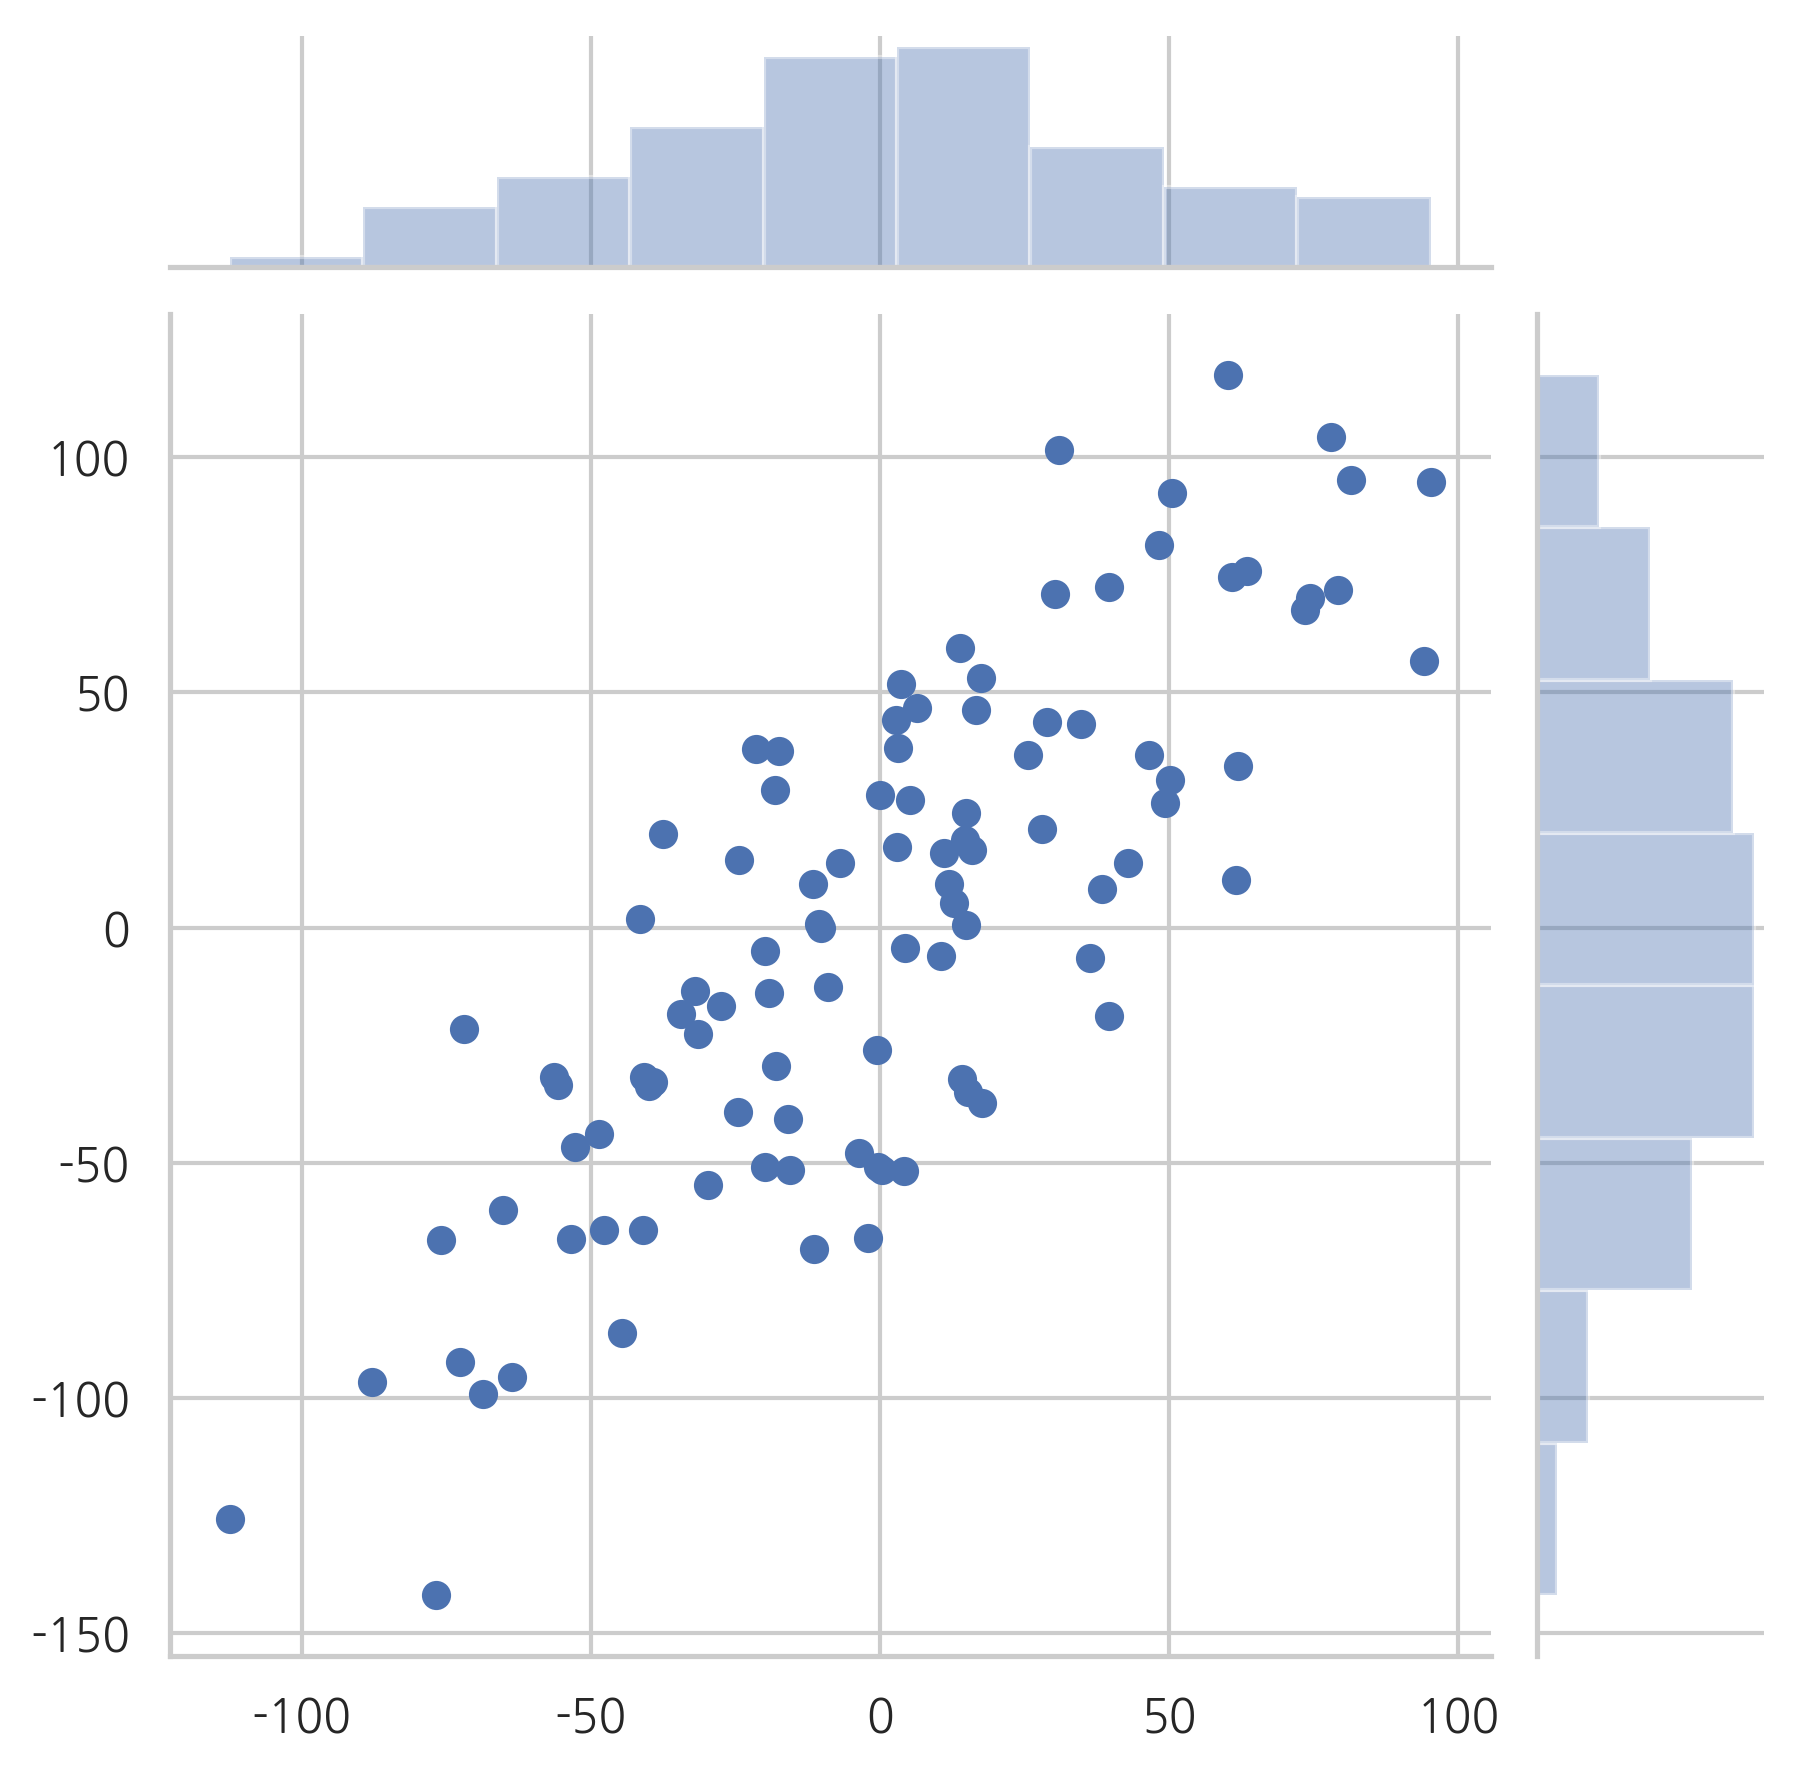

In [6]:
sns.jointplot(result.fittedvalues, y)
plt.show()

### 상수항이 없는 모형의 경우

모형에서 상수항을 지정하지 않은 경우에는 결정계수의 정의에 사용되는 TSS의 정의가 다음과 같이 달라진다.

$$\text{TSS} = \sum_i y_i^2 = y^Ty $$

즉, 실제 샘플평균과 상관없이 $\bar{y} = $이라는 가정하에 TSS를 계산한다. 이렇게 정의하지 않으면 TSS = RSS + ESS 관계식이 성립하지 않아서 결정계수의 값이 1보다 커지게 된다.

따라서 모형의 결정계수를 비교할 때 **상수항이 없는 모형과 상수항이 있는 모형은 직접 비교하면 안된다.**

In [7]:
X0, y, coef = make_regression(
    n_samples=100, n_features=1, noise=30, bias=100, coef=True, random_state=0)
dfX = pd.DataFrame(X0, columns=["X"])
dfy = pd.DataFrame(y, columns=["Y"])
df = pd.concat([dfX, dfy], axis=1)

model2 = sm.OLS.from_formula("Y ~ X + 0", data=df)
result2 = model2.fit()

In [8]:
result2.rsquared

0.18768724705943896

### F 검정을 이용한 모형 비교

F 검정을 이용하면 다음과 같이 포함관계(nesting)에 있는 두 모형의 성능을 비교할 수 있다. 

* 전체 모형(Full Model): $$ y = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_3 $$
* 축소 모형(Reduced Model): $$ y = w_0 + w_1 x_1 $$


다음과 같은 귀무 가설을 검정하는 것은 위의 두 모형이 실질적으로 같은 모형이라는 가설을 검장하는 것과 같다.

$$ H_0: w_2 = w_3 = 0 $$

이 검정도 F 검정을 사용하여 할 수 있다. StatsModels에서는 `anova_lm` 명령에 두 모형의 result 객체를 인수로 넣어주면 이러한 검정을 할 수 있다. 인수를 넣어줄 때는 축소 모형(reduced model), 전체 모형(full model)의 순서로 넣어준다.

In [9]:
from sklearn.datasets import load_boston

boston = load_boston()
dfX0_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy_boston = pd.DataFrame(boston.target, columns=["MEDV"])
dfX_boston = sm.add_constant(dfX0_boston)
df_boston = pd.concat([dfX_boston, dfy_boston], axis=1)

In [10]:
model_full = sm.OLS.from_formula(
    "MEDV ~ CRIM + ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", data=df_boston)
model_reduced = sm.OLS.from_formula(
    "MEDV ~ CRIM + ZN + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", data=df_boston)

sm.stats.anova_lm(model_reduced.fit(), model_full.fit())

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,494.0,11081.363952,0.0,NaN,NaN,NaN
1,492.0,11078.784578,2.0,2.579374,0.057274,0.944342


### F 검정을 사용한 변수 중요도 비교

F 검정은 각 독립변수의 중요도를 비교하기 위해 사용할 수 있다. 
방법은 전체 모형과 각 변수 하나만을 뺀 모형들의 성능을 비교하는 것이다. 이는 간접적으로 각 독립 변수의 영향력을 측정하는 것과 같다. 예를 들어 보스턴 집값 데이터에서 CRIM이란 변수를 뺀 모델과 전체 모델의 비교하는 검정을 하면 이 검정 결과는 CRIM변수의 중요도를 나타낸다.

In [11]:
model_full = sm.OLS.from_formula(
    "MEDV ~ CRIM + ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", data=df_boston)
model_reduced = sm.OLS.from_formula(
    "MEDV ~ ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", data=df_boston)

sm.stats.anova_lm(model_reduced.fit(), model_full.fit())

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,493.0,11322.004277,0.0,NaN,NaN,NaN
1,492.0,11078.784578,1.0,243.219699,10.801193,0.001087


`anova_lm` 명령에서는 `typ` 인수를 `2`로 지정하면 하나 하나의 변수를 뺀 축소 모형에서의 F 검정값을 한꺼번에 계산할 수 있다.

In [12]:
model_boston = sm.OLS.from_formula(
    "MEDV ~ CRIM + ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", data=df_boston)
result_boston = model_boston.fit()
sm.stats.anova_lm(result_boston, typ=2)

,sum_sq,df,F,PR(>F)
CRIM,243.219699,1.0,10.801193,1.086810e-03
ZN,257.492979,1.0,11.435058,7.781097e-04
INDUS,2.516668,1.0,0.111763,7.382881e-01
NOX,487.155674,1.0,21.634196,4.245644e-06
RM,1871.324082,1.0,83.104012,1.979441e-18
AGE,0.061834,1.0,0.002746,9.582293e-01
DIS,1232.412493,1.0,54.730457,6.013491e-13
RAD,479.153926,1.0,21.278844,5.070529e-06
TAX,242.257440,1.0,10.758460,1.111637e-03
PTRATIO,1194.233533,1.0,53.034960,1.308835e-12


이 값은 단일 계수 t 검정의 유의확률과 동일하다. 그 이유는 다음과 같은 t 분포와 F 분포의 동치 성질 때문이다.

$$ t_n^2 = F_{(1, n)} $$

### 조정 결정 계수

선형 회귀 모형에서 독립 변수가 추가되면 결정 계수의 값은 항상 증가한다. 이는 다음과 같이 확인할 수 있다.

종속 변수 $y$를 회귀 분석하기 위한 기존의 독립 변수가 $X$이고 여기에 추가적인 독립 변수 $z$가 더해졌을 때, 다음과 같은 관계가 성립한다.

$$
R^2_{Xz} = R^2_{X} + (1-R^2_{X})r^{\ast 2}_{yz}
$$

여기에서 
* $R^2_{X}$: 기존의 독립 변수 $X$를 사용한 경우의 결정 계수
* $R^2_{Xz}$: 기존의 독립 변수 $X$와 추가적인 독립 변수 $z$를 모두 사용한 경우의 결정 계수
* $r^{\ast 2}_{yz}$: 추가적인 독립 변수 $z$와 종속 변수 $y$간의 상관 관계 계수


이고 이 항목들은 모두 양수이므로 

$$
R^2_{Xz} \geq R^2_{X}
$$

이러한 독립 변수 추가 효과를 상쇄시키기 위한 다양한 기준들이 제시되었다. 그 중 하나가 다음과 같이 독립 변수의 갯수 $K$에 따라 결정 계수의 값을 조정하는 조정 결정 계수이다

$$
R_{adj}^2 = 1 - \frac{n-1}{n-K}(1-R^2) = \dfrac{(n-1)R^2 +1-K}{n-K}
$$



### 정보량 규준

조정 결정 계수와 함께 많이 쓰이는 모형 비교 기준은 최대 우도에 독립 변수의 갯수에 대한 손실(penalty)분을 반영하는 방법이다. 
이를 정보량 규준(information criterion)이라고 하며 손실 가중치의 계산 법에 따라 AIC (Akaike Information Criterion)와 BIC (Bayesian Information Criterion) 두 가지를 사용한다.

AIC는 모형과 데이터의 확률 분포 사이의 Kullback-Leibler 수준을 가장 크게하기 위한 시도에서 나왔다. BIC는 데이터가 exponential family라는 가정하에 주어진 데이터에서 모형의 likelihood를 측정하기 위한 값에서 유도되었다. 둘 다 값이 작을 수록 올바른 모형에 가깝다.

$$
\text{AIC} = -2\log L + 2K
$$

$$
\text{BIC} = -2\log L + K\log n
$$